# Atividades

In [ ]:
import numpy as np
from skimage.io import imread, imsave, imshow
from skimage.color import rgb2gray
from skimage.util import random_noise
from skimage.filters import threshold_otsu, threshold_niblack, threshold_sauvola, threshold_mean
from skimage.filters import sobel,roberts,prewitt,scharr
from skimage.restoration import denoise_nl_means, denoise_tv_bregman
import matplotlib.pyplot as plt

1) Leia uma imagem colorida, transforme a mesma em níveis de cinza e salve o resultado em disco. 

In [ ]:
imageName = 'luffy.jpg'
img = imread(imageName)

In [ ]:
img.shape

(645, 963, 3)

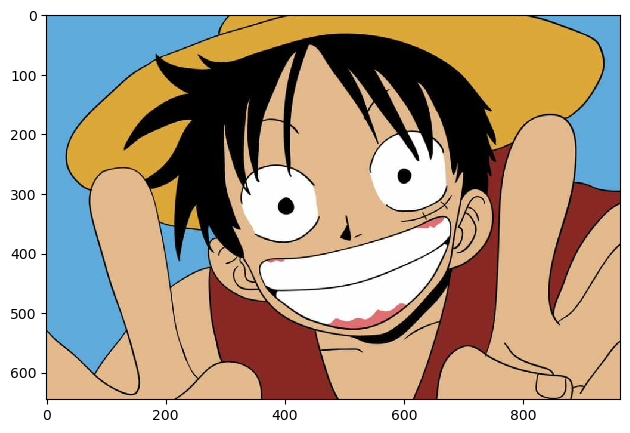

In [ ]:
imshow(img)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


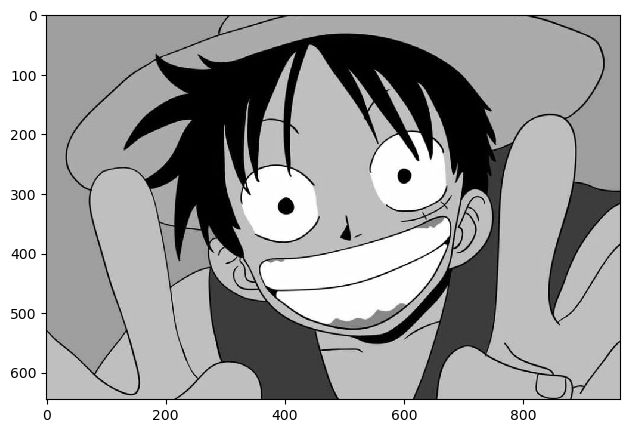

In [ ]:
imgGray = rgb2gray(img)
imshow(imgGray)
imsave('luffy_gray.jpg', imgGray)

2) Leia uma imagem colorida, transforme a mesma em níveis de cinza. Após isso, atribua o valor zero a todos os pixels cujo vizinho à direita tenha o mesmo valor de intensidade. Salve o resultado em disco.

In [ ]:
def editarPixels(img):
    linhas, colunas = img.shape
    for l in range(linhas):
        for c in range(colunas-1):
            if img[l,c] == img[l,c+1]:
                img[l,c] = 0
    return img

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


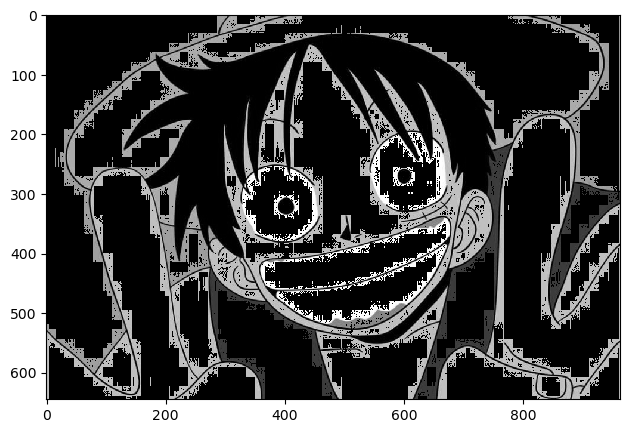

In [ ]:
imgAltered = editarPixels(rgb2gray(img))
imshow(imgAltered)
imsave('luffy_gray_altered.jpg', imgAltered)

3) Leia uma imagem colorida, calcule as componentes no modelo de cores RGB. Calcule a maior e menor intensidade dos pixels em cada componente.

In [ ]:
def maiorPixel(img):
    linhas, colunas = img.shape
    maior = 0
    for l in range(linhas):
        for c in range(colunas):
            if img[l,c] > maior:
                maior = img[l,c]
    return maior

In [ ]:
def menorPixel(img):
    linhas, colunas = img.shape
    menor = 255
    for l in range(linhas):
        for c in range(colunas):
            if img[l,c] < menor:
                menor = img[l,c]
    return menor

In [ ]:
colors = {'red': img[:,:,0], 'green': img[:,:,1], 'blue': img[:,:,2]}
pixels = dict()

In [ ]:
for color in colors:
    maior = maiorPixel(colors[color])
    menor = menorPixel(colors[color])
    pixels[color] = [maior, menor]
    

In [ ]:
for color in colors:
    print('='*20)
    print(color)
    print('Maior pixel: ', pixels[color][0])
    print('Menor pixel: ', pixels[color][1])

red
Maior pixel:  255
Menor pixel:  0
green
Maior pixel:  255
Menor pixel:  0
blue
Maior pixel:  255
Menor pixel:  0


4) Leia uma imagem colorida, calcule as componentes no modelo de cores RGB.  Atribua o valor 255 a todos os pixels com intensidade maior que 150, faça isso em cada componente. Após isso, junte as componentes para formar uma imagem colorida novamente e salve o resultado.

In [ ]:
def alteraPixels(img):
    linhas, colunas = img.shape
    for i in range(linhas):
        for j in range(colunas):
            if img[i][j] > 150:
                img[i][j] = 255
    return img

In [ ]:
newImage = dict()

In [ ]:
for color in colors:
    newImage[color] = alteraPixels(colors[color])

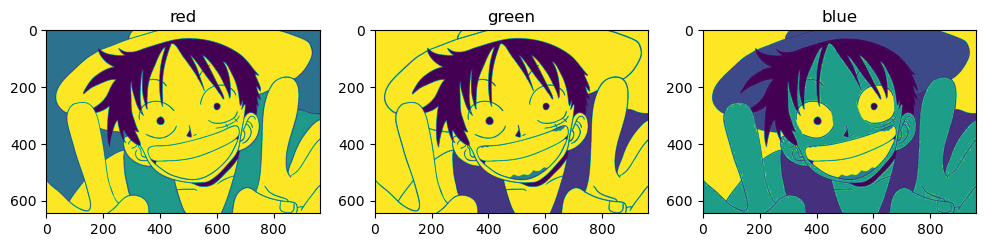

In [ ]:
fig = plt.figure(figsize=(12,8))

fig.add_subplot(1,3,1)
plt.title('red')
plt.imshow(newImage['red'])

fig.add_subplot(1,3,2)
plt.title('green')
plt.imshow(newImage['green'])

fig.add_subplot(1,3,3)
plt.title('blue')
plt.imshow(newImage['blue'])

fig.savefig('luffy_rgb.jpg')

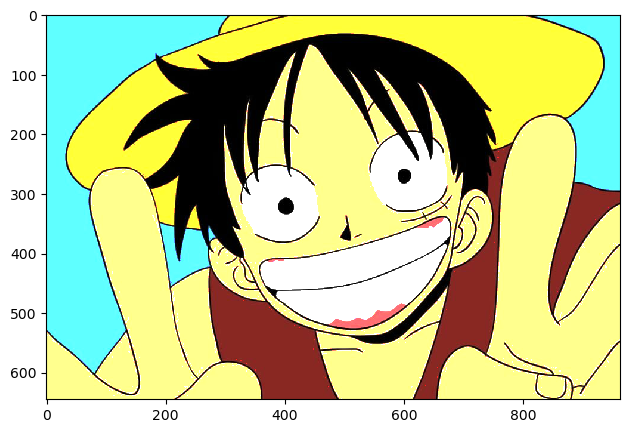

In [ ]:
#juntando os componentes
matriz = np.dstack((newImage['red'], newImage['green'], newImage['blue']))
imshow(matriz)
imsave('luffy_matriz.jpg', matriz)

5) Aplique ruído em uma imagem utilizando a função "skimage.util.random_noise" com os seguites parâmentros: ‘s&p’, ‘gaussian’ e ‘speckle’. Cada um desses parâmetros irá gerar uma imagem com ruído. Após isso, aplique funções disponíveis em 'skimage.restoration' para recuperar as imagens.

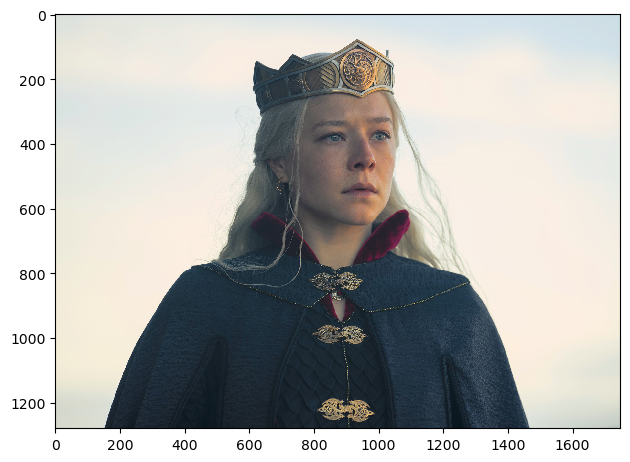

In [ ]:
img2 = imread('rhaenyra.jpg')
imshow(img2)

In [ ]:
img2.shape

(1280, 1747, 3)



*   Ruídos



In [ ]:
def aplicaRuido(img,tipo):
    return random_noise(img, mode=tipo)

In [ ]:
ruidos = ['gaussian', 's&p', 'speckle']
imgRuidos = dict()
for r in ruidos:
    imgRuidos[r] = aplicaRuido(img2, r)

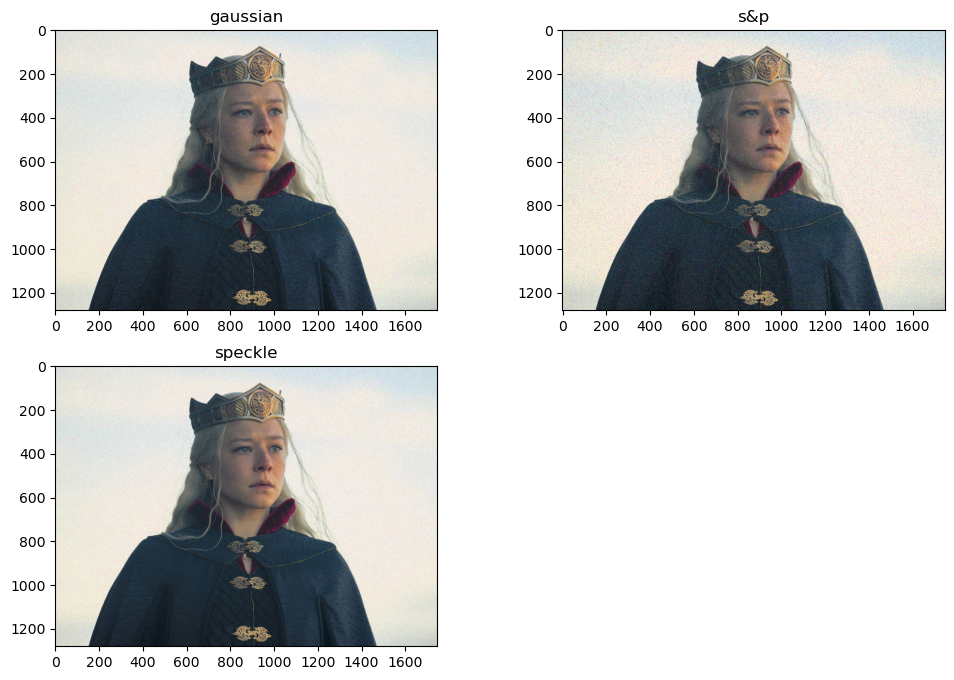

In [ ]:
fig = plt.figure(figsize=(12,8))
fig.add_subplot(221)
plt.title(ruidos[0])
plt.imshow(imgRuidos[ruidos[0]])

fig.add_subplot(222)
plt.title(ruidos[1])
plt.imshow(imgRuidos[ruidos[1]])

fig.add_subplot(223)
plt.title(ruidos[2])
plt.imshow(imgRuidos[ruidos[2]])

fig.savefig('rhaenyra_noise.jpg')



*   Restauração



In [ ]:
def restauraImg(img, tipo):
    rest1 = denoise_tv_bregman(img)
    rest2 = denoise_nl_means(img, channel_axis=2)

    fig = plt.figure(figsize=(12,8))
    fig.add_subplot(131)
    plt.title(tipo)
    plt.imshow(img)

    fig.add_subplot(132)
    plt.title('denoise_tv_bregman')
    plt.imshow(rest1)

    fig.add_subplot(133)
    plt.title('denoise_nl_means')
    plt.imshow(rest2)

    fig.savefig('rhaenyra_restaured_'+tipo+'.jpg')

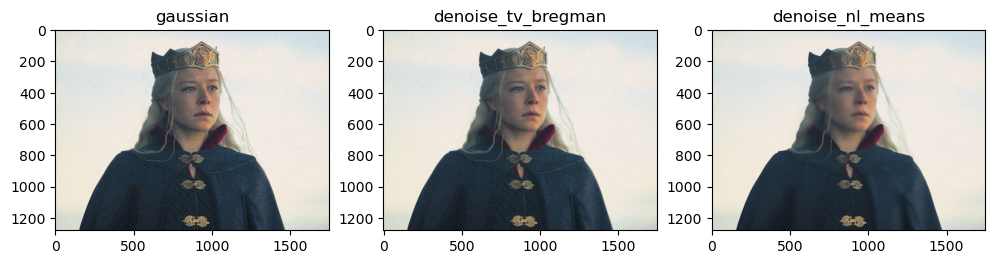

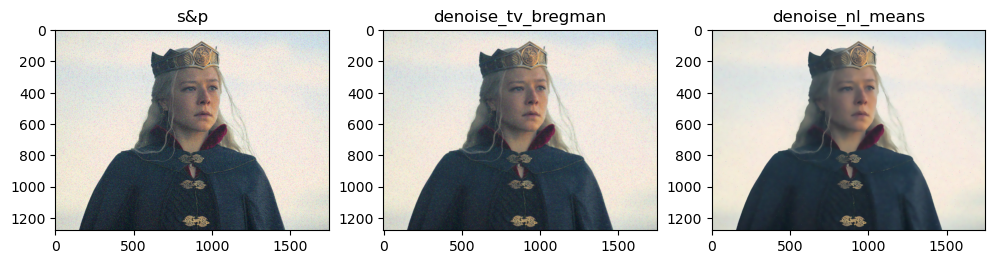

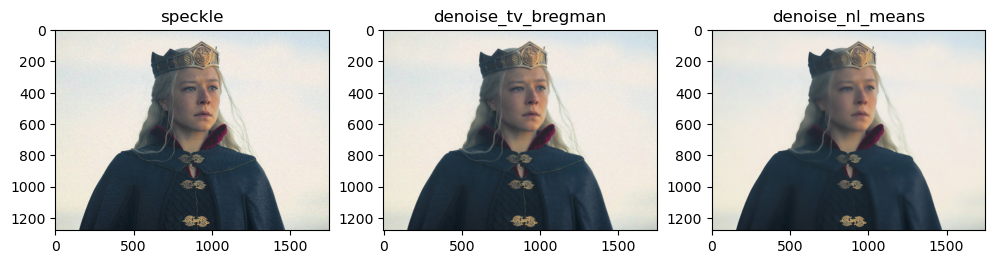

In [ ]:
for i in imgRuidos:
    restauraImg(imgRuidos[i], i)
    plt.show()

6) Aplique pelo menos 4 métodos diferentes para binarizar uma imagem ('skimage.filters').

In [ ]:
imgOutsu = imgGray > threshold_otsu(imgGray)
imgNiblack = imgGray > threshold_niblack(imgGray)
imgSauvola = imgGray > threshold_sauvola(imgGray)
imgMean = imgGray > threshold_mean(imgGray)

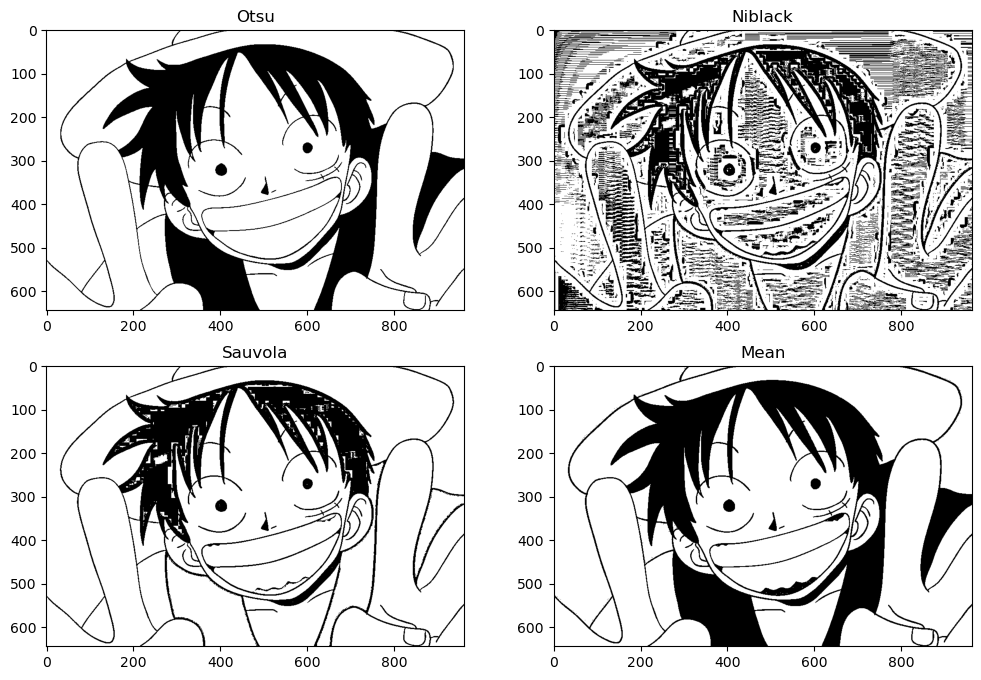

In [ ]:
fig = plt.figure(figsize=(12,8))

fig.add_subplot(221)
plt.title('Otsu')
plt.imshow(imgOutsu, cmap='gray')

fig.add_subplot(222)
plt.title('Niblack')
plt.imshow(imgNiblack, cmap='gray')

fig.add_subplot(223)
plt.title('Sauvola')
plt.imshow(imgSauvola, cmap='gray')

fig.add_subplot(224)
plt.title('Mean')
plt.imshow(imgMean, cmap='gray')

fig.savefig('luffy_threshold.jpg')

7) Aplique pelo menos 4 métodos diferentes ('skimage.filters') para calcular as bordas de uma imagem utilizando como entrada o resultado da questão anterior.

In [ ]:
contornoSobel = sobel(imgOutsu)
contornoRoberts = roberts(imgOutsu)
contornoPrewitt = prewitt(imgOutsu)
contornoScharr = scharr(imgOutsu)

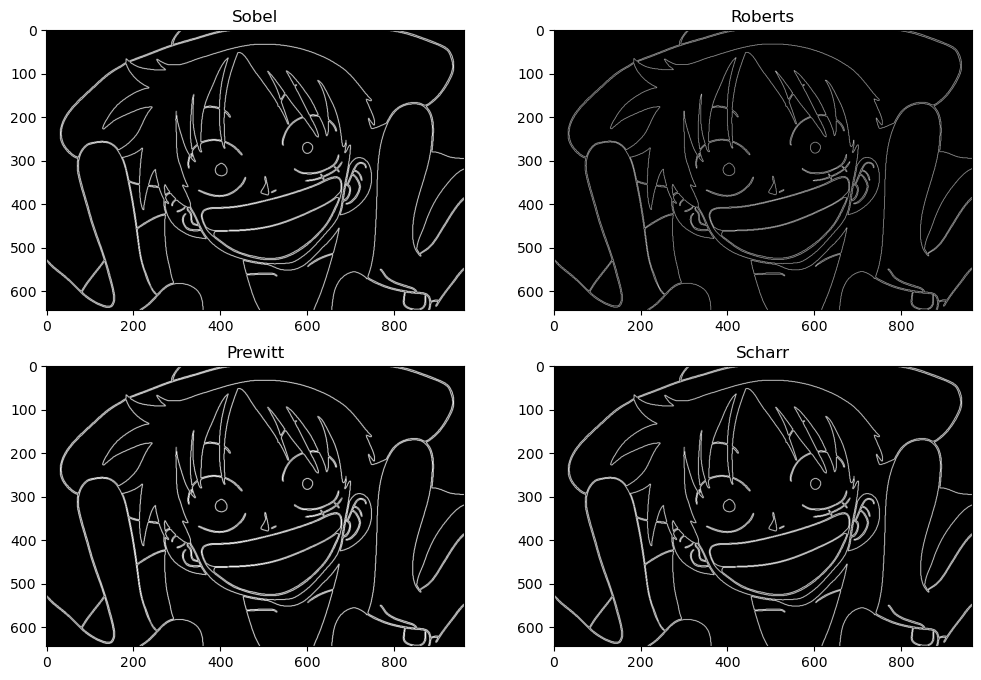

In [ ]:
fig = plt.figure(figsize=(12,8))

fig.add_subplot(221)
plt.title('Sobel')
plt.imshow(contornoSobel, cmap='gray')

fig.add_subplot(222)
plt.title('Roberts')
plt.imshow(contornoRoberts, cmap='gray')

fig.add_subplot(223)
plt.title('Prewitt')
plt.imshow(contornoPrewitt, cmap='gray')

fig.add_subplot(224)
plt.title('Scharr')
plt.imshow(contornoScharr, cmap='gray')

fig.savefig('luffy_contorno.jpg')

8) Recorte uma imagem da seguinte forma:
- O corte será feito no canal de cor com a maior media de pixels.
- O centro do corte deve ser o pixel com o maior desvio padrão em uma janela 3x3.
- O tamanho do recorte será 1/4 do tamanho da imagem. Ex: Imagem 100 x 80 -> Recorte 25 x 20
- Cuidado com as bordas! Caso uma janela fique fora da imagem, o centro do recorte deverá ser alterado.

In [ ]:
sizeCut = (img.shape[0] // 4, img.shape[1] // 4)
sizeCut

(161, 240)

In [ ]:
mediaPixel = dict()
for color in colors:
    mediaPixel[color] = round(np.mean(colors[color]),2)

In [ ]:
mediaPixel

{'red': 164.22, 'green': 143.61, 'blue': 118.74}

In [ ]:
maiorMedia = max(mediaPixel, key=mediaPixel.get)
maiorCanal = colors[maiorMedia]

In [ ]:
def getStd(img):
    stdDev = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            stdDev[i][j] = np.std(img[i:i+3, j:j+3])
    return stdDev

In [ ]:
def getPixelStd(img):
    stdDev = getStd(img)
    maxStdDev = np.max(stdDev)
    maxStdDevIndex = np.where(stdDev == maxStdDev)
    return maxStdDevIndex

In [ ]:
stdPixel = getPixelStd(maiorCanal)
stdPixel

(array([453], dtype=int64), array([508], dtype=int64))

In [ ]:
centro = (stdPixel[0][0], stdPixel[1][0])
centro

(453, 508)

In [ ]:
def cropImage(img, center, size):
    x = center[0]
    y = center[1]
    w = size[0]//2
    h = size[1]//2
    return img[x-w:x+w, y-h:y+h]

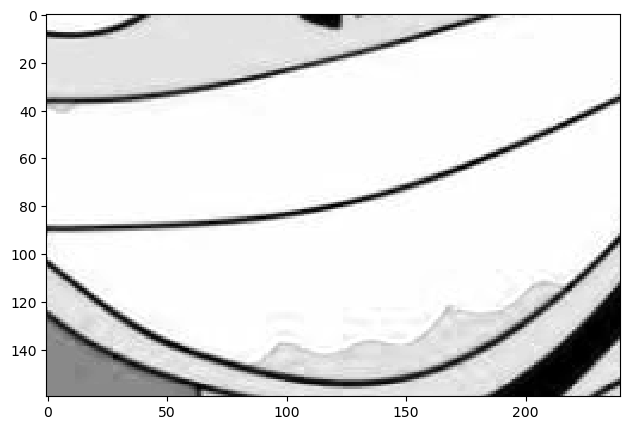

In [ ]:
cutImg = cropImage(maiorCanal, centro, sizeCut)
imshow(cutImg)

In [ ]:
cutImg.shape

(160, 240)